In [1]:
!pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/samrand.toufani@acu.edu.au/CD85-2E71-9EDD-ABA4-3097-FB97-501A-EBA3/GraphLab-Create-License.tar.gz

  Could not find a version that satisfies the requirement graphlab-create>=2.1 (from GraphLab-Create-License==2.1) (from versions: )
No matching distribution found for graphlab-create>=2.1 (from GraphLab-Create-License==2.1)


In [2]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\jasper\downloads\download\anaconda\lib\site-packages (18.0)


In [3]:
import requests, numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scrape_data=pd.read_csv('my_new_job.csv',index_col=[0])

In [5]:
#dropping any duplicate rows:
scrape_data = scrape_data.drop_duplicates()
scrape_data.reset_index(drop=True, inplace=True)
scrape_data.shape

(1029, 9)

# Cleaning Salary

we need to get rid of these and “\n” strings before we can go much further.

On top of this, you’ll notice that salaries can be presented as single figures, or ranges, and that they can appear on different scales of payment — per year, per month, or per hour. I needed to take care of all of these items in the course of preparing my salary data for further analysis.

In [6]:
#some targeted cleaning of salary information to make parsing easier #—> remove “\n”, “$”, and “,”
scrape_data["salary"] = scrape_data["salary"].str.replace("\r\n", "")
#scrape_data["salary"] = scrape_data["salary"].str.replace("\r", "")
scrape_data["salary"] = scrape_data["salary"].str.replace(",", "")
scrape_data["salary"] = scrape_data["salary"].str.replace("$", "")

I did want to preserve information about these original pay scales for possible future use. As such, I created a new column of data to capture this. I called this new column “og_salary_period”:

In [7]:
scrape_data["og_salary_period"] = 0
scrape_data["salary_year"]=0
scrape_data["salary_month"]=0
scrape_data["salary_week"]=0
scrape_data["salary_day"]=0
scrape_data["salary_hour"]=0
#if the salary contains information on time period, save that time
#period string in the og_salary_period column

In [8]:
mask=scrape_data.loc[scrape_data["salary"].str.contains("year")==True].index
mask1=scrape_data.loc[scrape_data["salary"].str.contains("month")==True].index
mask2=scrape_data.loc[scrape_data["salary"].str.contains("week")==True].index
mask3=scrape_data.loc[scrape_data["salary"].str.contains("day")==True].index
mask4=scrape_data.loc[scrape_data["salary"].str.contains("hour")==True].index


In [9]:
for i in mask:
    scrape_data['og_salary_period'][i]='year'
    scrape_data["salary_year"][i]=scrape_data["salary"][i]
scrape_data["salary_year"]

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package

0                                            0
1                                            0
2                                            0
3                                            0
4                        60000 - 120000 a year
5                                            0
6                                            0
7                                            0
8                                            0
9                                            0
10                                           0
11                                           0
12                                           0
13                       60000 - 120000 a year
14                                           0
15                                           0
16                                           0
17                                           0
18                                           0
19                                           0
20                                           0
21           

In [10]:
for i in mask1:
    scrape_data['og_salary_period'][i]='month'
    scrape_data["salary_month"][i]=scrape_data["salary"][i]
    

In [11]:
for i in mask2:
    scrape_data['og_salary_period'][i]='week'
    scrape_data["salary_week"][i]=scrape_data["salary"][i]
for i in mask3:
    scrape_data['og_salary_period'][i]='day'
    scrape_data["salary_day"][i]=scrape_data["salary"][i]
for i in mask4:
    scrape_data['og_salary_period'][i]='hour'
    scrape_data["salary_hour"][i]=scrape_data["salary"][i]

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jasper\Downloads\download\Anac

In [12]:
scrape_data["salary"].value_counts()

                60000 - 120000 a year     24
                75000 - 80000 a year      19
                42000 - 50500 a year      19
                75000 - 100000 a year     19
                65000 - 110000 a year     19
                82110 a year              19
                70000 - 80000 a year      19
                22.50 an hour             19
                120000 - 160000 a year    12
                88171 - 95444 a year      12
                750 a day                 12
                91000 - 98000 a year      12
                109620 a year              9
                67562 - 90827 a year       9
                64501 - 75731 a year       9
                91435 a year               8
                80000 - 90000 a year       2
                109000 - 128000 a year     2
                82281 - 88333 a year       1
                200000 - 300000 a year     1
                131000 - 145000 a year     1
                97000 - 105000 a year      1
          

In [13]:
# removing string values(" a year", " a week", etc. from salary dfs)
scrape_data["salary_year"] = scrape_data["salary_year"].str.replace("a year", "")
#scrape_data["salary_month"] = scrape_data["salary_month"].str.replace("a month", "")
#scrape_data["salary_week"] = scrape_data["salary_week"].str.replace("a week", "")
scrape_data["salary_day"] = scrape_data["salary_day"].str.replace("a day", "")
scrape_data["salary_hour"] = scrape_data["salary_hour"].str.replace("an hour", "")


Next, I defined a function that would detect when salary information was provided in a range (by looking for a hyphen in the data), and return an average of the two values. If there is no hyphen, it simply returns the single value as a float.

In [14]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

scrape_data.salary_year = scrape_data.salary_year.apply(remove_whitespace)
scrape_data.salary_day=scrape_data.salary_day.apply(remove_whitespace)
scrape_data.salary_hour=scrape_data.salary_hour.apply(remove_whitespace)

In [15]:
scrape_data.salary_year.replace('nan',0,inplace=True)
scrape_data.salary_day.replace('nan',0,inplace=True)
scrape_data.salary_hour.replace('nan',0,inplace=True)

In [16]:
print('salary_day: ',scrape_data.salary_day.value_counts(),'\n salary_hour ',scrape_data.salary_hour.value_counts())

salary_day:  750    12
Name: salary_day, dtype: int64 
 salary_hour  22.50    19
Name: salary_hour, dtype: int64


In [17]:
scrape_data[['salary_day','salary_hour']] = scrape_data[['salary_day','salary_hour']].astype(float)
scrape_data["salary_day"]=scrape_data["salary_day"]*260
scrape_data["salary_hour"]=scrape_data["salary_hour"]*8*260

In [18]:
#splitting my salaries to find an average

scrape_data["salary_year"]=scrape_data["salary_year"].str.split('-',2)


In [19]:
scrape_data['lower'] = scrape_data['salary_year'].str[0].astype('float')
scrape_data['upper'] = scrape_data['salary_year'].str[1].astype('float')
scrape_data['avg'] = scrape_data[['lower','upper']].mean(axis=1)
#finding an average salary
    
 

In [20]:
scrape_data["job_title"].str.split('-',2).str[1].value_counts()

 Reserve                                                 24
 Java/C/C++/PHP                                          24
2018                                                     24
 Fast Growing Startup                                    24
time or Job Share) Technology Solutions Professional     23
 Medical Image Analysis                                  20
 Sydney Airport ABG                                      19
time Casual Dog Walker                                   19
 1 years fixed term hire                                 19
 FIFO                                                    19
 Big Data / Machine Learning                             12
 AI, Machine Learning, Innovation                        12
 Plant Development                                       12
 Customer Analytics                                      12
based)                                                   11
 Site Reliability Enginee...                             11
 Intern                                 

In [21]:
scrape_data["job_title"] = scrape_data["job_title"].str.replace("22-2018 - APS Level 6 - Executive Level 1 - Budget Analyst,...", "Budget Analyst")
scrape_data["job_title"] = scrape_data["job_title"].str.replace("(Part-time or Job Share)", "")
list1=["(freelance / part time) ","(", ") ","- June 2019 Intake","Part Time","- 1year Fixed Term Contract - Sydney ","-","Part Time","Reserve","Sydney","(Sydney)"]
scrape_data["job_title"].replace(list1, "") 
scrape_data["job_title"] = scrape_data["job_title"].str.replace("(", "")
scrape_data["job_title"] = scrape_data["job_title"].str.replace(")", "")

In [22]:
scrape_data.job_title.value_counts()

Data Scientist                                                     46
Business Intelligence Analyst                                      33
Data Analyst                                                       26
Property Analyst                                                   24
Advanced Trainee                                                   24
Operations Analyst - Fast Growing Startup                          24
Pathologist and Research Scientist - Reserve                       24
Technical Marketing Content Writer freelance / part time           24
Budget Analyst                                                     24
Programming Geek - Java/C/C++/PHP                                  24
Business Analyst Process Improvement Professional                  24
Executive Interviewer – Part Time                                  24
Provisional Fellow                                                 23
 Technology Solutions Professional -...                            23
Airport Services Age

In [23]:
#Technology Solutions Professional
scrape_data["job_title"].str.split('-',2).str[0]

0                     Pathologist and Research Scientist 
1       Business Analyst Process Improvement Professional
2                                     Operations Analyst 
3                                        Property Analyst
4       Technical Marketing Content Writer freelance /...
5                                       Programming Geek 
6                                        Advanced Trainee
7                       Executive Interviewer – Part Time
8                                          Budget Analyst
9                     Pathologist and Research Scientist 
10      Business Analyst Process Improvement Professional
11                                    Operations Analyst 
12                                       Property Analyst
13      Technical Marketing Content Writer freelance /...
14                                      Programming Geek 
15                                       Advanced Trainee
16                      Executive Interviewer – Part Time
17            

In [24]:
scrape_data["job_title"]=scrape_data["job_title"].str.split('-',2).str[0]

In [25]:
scrape_data["salary_day"].value_counts()

195000.0    12
Name: salary_day, dtype: int64

In [26]:
scrape_data["salary_hour"][mask4]

69     46800.0
89     46800.0
118    46800.0
148    46800.0
180    46800.0
213    46800.0
263    46800.0
296    46800.0
336    46800.0
385    46800.0
436    46800.0
495    46800.0
556    46800.0
617    46800.0
678    46800.0
739    46800.0
800    46800.0
861    46800.0
922    46800.0
Name: salary_hour, dtype: float64

In [27]:
for i in mask4:
    scrape_data['avg'][i] = 46800
scrape_data['avg'][mask4] #bring back the calclculated salary per hour to year to salary_avg

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


69     46800.0
89     46800.0
118    46800.0
148    46800.0
180    46800.0
213    46800.0
263    46800.0
296    46800.0
336    46800.0
385    46800.0
436    46800.0
495    46800.0
556    46800.0
617    46800.0
678    46800.0
739    46800.0
800    46800.0
861    46800.0
922    46800.0
Name: avg, dtype: float64

In [28]:
for i in mask3:
    scrape_data["avg"][i]= 195000
scrape_data['avg'][mask3]

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


313    195000.0
353    195000.0
402    195000.0
453    195000.0
512    195000.0
573    195000.0
634    195000.0
695    195000.0
756    195000.0
817    195000.0
878    195000.0
939    195000.0
Name: avg, dtype: float64

In [29]:
scrape_data ["avg"].value_counts()                                     

87500.0     38
90000.0     25
82110.0     19
46250.0     19
46800.0     19
77500.0     19
75000.0     19
195000.0    12
94500.0     12
91807.5     12
140000.0    12
70116.0      9
109620.0     9
79194.5      9
91435.0      8
118500.0     2
85000.0      2
138000.0     1
125000.0     1
111207.0     1
99000.0      1
90850.0      1
250000.0     1
85307.0      1
101000.0     1
70000.0      1
157080.0     1
Name: avg, dtype: int64

# Cleaning State

In [30]:
scrape_data["city"]=scrape_data["city"].replace("Australia"," Sydney NSW")

In [31]:
#to create a column for state and replaces the null values of rows with state's name

mask_NSW=scrape_data.loc[scrape_data["city"].str.contains("NSW")==True].index
mask_VIC=scrape_data.loc[scrape_data["city"].str.contains("VIC")==True].index
mask_QLD=scrape_data.loc[scrape_data["city"].str.contains("QLD")==True].index
mask_ACT=scrape_data.loc[scrape_data["city"].str.contains("ACT")==True].index
mask_WA=scrape_data.loc[scrape_data["city"].str.contains("WA")==True].index


In [32]:
for i in mask_NSW:
    scrape_data['state'][i]='NSW'
for i in mask_VIC:
    scrape_data['state'][i]='VIC'
for i in mask_QLD:
    scrape_data['state'][i]='QLD'
for i in mask_ACT:
    scrape_data['state'][i]='NSW'
for i in mask_WA:
    scrape_data['state'][i]='WA'   
    

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jasper\Downloads\download\Anaconda\lib\sit

In [33]:
scrape_data.state.value_counts()

NSW    853
VIC     96
Nan     42
QLD     37
WA       1
Name: state, dtype: int64

In [34]:
#some targeted cleaning of company information to make parsing easier #—> remove “\r\n"
scrape_data["company"] = scrape_data["company"].str.replace("\r\n", "")
scrape_data["job_description"] = scrape_data["job_description"].str.replace("\r\n", "")
scrape_data["company"] = scrape_data["company"].str.replace("and", "")

In [35]:
#dropping columns so I'm only left with average column
scrape_data=scrape_data.drop(columns=['salary_category', 'city','salary','date','lower','upper','salary_year'],axis=1)

In [36]:
#dropping columns so I'm only left with average column
scrape_data=scrape_data.drop(columns=['salary_month','salary_week','og_salary_period','salary_day','salary_hour'],axis=1)

In [37]:
scrape_data=scrape_data.drop(columns=['job_type'],axis=1)

In [38]:
#fillout the null values with median for salary
scrape_data.avg=scrape_data.avg.fillna(scrape_data.avg.median())



In [39]:
#deleting jobs that are non related
scrape_data=scrape_data[scrape_data.job_title!='Chocolate moulding']
scrape_data=scrape_data[scrape_data.job_title!='Airport Services Agent (9 months contract)']
scrape_data=scrape_data[scrape_data.job_title!='Passenger Attendant']
scrape_data=scrape_data[scrape_data.job_title!='Full-time Casual Dog Walker']
scrape_data=scrape_data[scrape_data.job_title!='Airport Manager']  
scrape_data=scrape_data[scrape_data.job_title!='Storepeople (Stock Inventory)']  
scrape_data=scrape_data[scrape_data.job_title!='Pick Packer'] 



In [40]:
scrape_data.shape

(972, 5)

# Save my results as a CSV

In [41]:
#saving my clean salary data to a csv
scrape_data.to_csv("Pythonclean_salary.csv" , sep=',', encoding='utf-8')

Predicting salaries using Random Forests + Another Classifier

In [42]:
data=pd.read_csv("Pythonclean_salary.csv",index_col=0)

I want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)¶
I could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a binary classification problem, by predicting two classes, HIGH vs LOW salary.

H0: there is no difference between low and high salary receivers in terms of tools and expereince applicants need to know 
Hi1: There is a big difference between between low and high salary receivers in terms of tools and expereince applicants need to know  



In [43]:
#finding the median
import numpy as np
median = np.median(data.avg)
print (median)

87500.0


In [44]:
data['dumsal'] = (data["avg"] > data["avg"].median()).astype(int)

data.dumsal.value_counts()
#inorder to find high and low income earne jobs, I create a dummy column which return 1 if the salary over the average and 0 if it is lower than average

0    872
1    100
Name: dumsal, dtype: int64

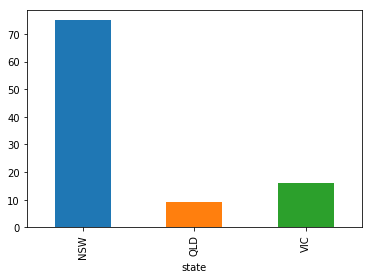

In [45]:
data.loc[data['dumsal']>0].groupby(['state']).dumsal.sum().plot(kind='bar') #majority of the high income jobs are in NSW

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
X = data.job_description
y = data.dumsal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [48]:
list_stop_words=['english','term','payment','store','external','homes','professionals',
                 'opening','2018','pearl','we','and','currently','one','that','they','pick','july','fixed','will','information','tourist','2600','destination','nsw','days','coast','where','partner','up','in','or','on','ensuring','join','shell','area','specialist','operational','to','00am','from','dogs','retail','park','sqm','centre','payments','cards','closely','plant','be','undertake','them','of','manufacturing','off','you','hire','which','per','their','able','for','the','week','30','similar','work','are','take','include','areas','an','as','is','outputs','at','position','is','with','initiate','our','agencies','duties','ensure','require','other','by','about','looking','year','recruiting','these','these','process','sydney','within','exciting','these','teams','conduct','verification','strategic','responsible','central','run',
                 'help','can','skills','qualification','recognition','evaluation','provide',
                 'end','analysts','required','suite','including',
                 'job','business','implementation','development','analytics',
                 'lgbti','time','criteria','computer','facilitate','learning',
                 'client','related','ability','improvement','value','have','also',
                 'how','opportunity','junior','12','concepts','numbers',
                 'processing','manage','manipulation','qualifaction','team','products',
                 'chief','high','teaching','pattern','month','apply','into','depth','large',
                 'contract','change','advanced','lead','skill','meet','perform',
                 'key','understanding','qualification','months','appropriate',
                 'years','insight','complex','minimum','proven','system','function','below',
                'working','product','need','group','extensive','obtain','ll','there','efficient',
                 'training','engineering','stock','quality','performs','services','following','transformed',
                'torres','strong','purpose','desdcription','ai','based','decisions','deliver','successful',
                'this','field','devops','growing','respond','positions','queries','then','qualifications',
                 'integrated','but','staff','assigned','medical','prompted','incoming','management','quantitative','science','strategy','lifecycle','projects'
                ,'research','analysis','technical','selection','roles','writers','heavily','who','part','now','regularly','economic'
                'after','if','division','taking','out','groups','variety','market','financial','passionate','after','substantial','role'
                'particiaption','spotless','developing','officer','requests','systems','description','sets','description'
                'corporate','application','participation','diverse','mintel','focussed','staff','corporate','background','fill','45',
                'role','interviews','identify','created','driven','candidate','administration','projects','account','big','re','needs','social','cultivate',
                'carry','handful','candidates','averaging','multiple','economic','maintain','minutes','sources','students','internal','includes','demonstrated','clients','insights','analyst','interface','online','westfield',
                 'preferably','tumours','basis','problems','partners','inventory','utilising','real','full','but','enrichment',
                 'storeperson','consumer','make','applications','commitment','using','employment','neuroendocrine','relationship','platform','qualitative',
                'procurement','techniques','world','fruit','aboriginal','range','collection','industry','centres','cancer','collaborate','project',
                'dev','primarily','script','primarily','collate','clinical','leading','baseline','simulations','expert','understand','globally','maintaining','enable','makers','ages','responsibility','various',
                'knowledge','methods','solve','agree','units','image','solutions','activities','gr','salary','explore','drive','adds','strait','patients','sme','hr','scientists','promote','theory','disabilities','robust','cash','marketing','people','operate','engineers','daisee',
                'savings','software','2019','islander','plus','community','learn','relationships','get','use','june','rx1','consultants','welcome','encourage','discounts','knowledgeable','optimised','designing','yr','mac','algorithm','bdms','leads','submit','joining','competitive','data',
                 'peter','empowered','supporting','great','adoption','edition','do','addition','app','employs','equities',
                'army','contribute','leaders','treatment','produce','brisbane','education','food','licensing','tactical','unit',
                'cool','newly','map','gaming','through','sits','known','proving','assessment','internally',
                 'customer','involve','least','health','condition','strategies','decision',
                 'previous','network','survey','innovation','my','added','while']

cvec = CountVectorizer(stop_words=list_stop_words).fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [49]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
print (df_train.shape)
print (y_train.shape)
print (df_test.shape)
print (y_test.shape)

(651, 294)
(651,)
(321, 294)
(321,)


In [50]:
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(df_train, y_train)
lr.score(df_test, y_test)
#The model made has high score which mean we can trust
#this is my description score

0.881619937694704

R-square .88 is high enough to accept the predictivity of the model.Run Logistic Regression With A L1 Penalty With Various Regularization Strengths The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

In [51]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(lr, df_test, y_test, cv=6)
print ("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(lr, df_test, y_test, cv=6)
accuracy = metrics.accuracy_score(y_test, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-validated scores: [0.87272727 0.87037037 0.88679245 0.88679245 0.88679245 0.88679245]
Cross-Predicted Accuracy: 0.881619937694704


C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ANother measure of the predictivity is Cross-Predicted Accuracy which high 

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
RF = rf.fit(df_train,y_train)
s = cross_val_score(rf, df_train, y_train, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.847 ± 0.148


In [53]:
rf_features = pd.DataFrame(RF.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
rf_features.head(20)

,importance
writing,0.222347
experience,0.093193
intelligence,0.063077
linux,0.054975
artificial,0.051900
programming,0.045941
solving,0.027982
machine,0.027056
scientist,0.020335
statistics,0.019148


The most important words in the dataset are intelligence, experience,linux,artifical,python,scientist)

#### Create a few new variables in my dataframe to represent interesting features of a job description. Then I built a new Random Forest with these features.

In [54]:
#manager, visualization, nlp,scientist,experience,python,sql
data['vis'] = list(map(int, data['job_description'].str.lower().str.contains('vis')))
data['nlp'] = list(map(int, data['job_description'].str.lower().str.contains('nlp')))
data['scientist'] = list(map(int, data['job_description'].str.lower().str.contains('scien')))
data['experience'] = list(map(int, data['job_description'].str.lower().str.contains('exp')))
data['python'] = list(map(int, data['job_description'].str.lower().str.contains('pyth')))
data['sql'] = list(map(int, data['job_description'].str.lower().str.contains('sql'))) 
data['manager']=list(map(int, data['job_description'].str.lower().str.contains('manager')|
                  data['job_description'].str.lower().str.contains('mngr')|
                  data['job_description'].str.lower().str.contains('mgr')))
data['machine']=list(map(int, data['job_description'].str.lower().str.contains('mach'))) 
data['java']=list(map(int, data['job_description'].str.lower().str.contains('java'))) 
data['writing']=list(map(int, data['job_description'].str.lower().str.contains('writ')))
data['matlab']=list(map(int, data['job_description'].str.lower().str.contains('matla')))
#making dummies for the words at the top of this cell
data.head()

,state,job_title,company,job_description,avg,dumsal,vis,nlp,scientist,experience,python,sql,manager,machine,java,writing,matlab
0,NSW,Pathologist and Research Scientist,Australian Army,Research Scientists are also integral componen...,87500.0,0,0,0,1,0,0,0,0,0,0,0,0
1,NSW,Business Analyst Process Improvement Professional,Children's Cancer Institute,5+ years’ experience as a Business...,87500.0,0,0,0,0,1,0,0,0,0,0,0,0
2,NSW,Operations Analyst,chill,You are passionate about the abili...,87500.0,0,0,0,0,0,0,0,0,0,0,0,0
3,NSW,Property Analyst,JLL,Taking the lead in quality managem...,87500.0,0,0,0,0,0,0,0,0,0,0,0,0
4,NSW,Technical Marketing Content Writer freelance /...,Daisee,"Daisee employs data scientists, so...",90000.0,1,0,0,1,1,0,0,0,0,0,1,0


In [55]:
#to illustrates the importance of some keywords compare to others
sum_vis=data['vis'].sum()
sum_nlp=data['nlp'].sum()
sum_scientist=data['scientist'].sum()
sum_python=data['python'].sum()
sum_sql=data['sql'].sum()
sum_exp=data['experience'].sum()
sum_manager=data['manager'].sum()
sum_machine=data['machine'].sum()
sum_java=data['java'].sum()
sum_writing=data['writing'].sum()
sum_matlab=data['matlab'].sum
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = [('sum_vis', sum_vis),
     ('sum_nlp', sum_nlp),
     ('sum_scientist', sum_scientist),
     ('sum_python', sum_python),
     ('sum_sql', sum_sql),
     ('sum_exp', sum_exp),
     ('sum_manager',sum_manager),
     ('sum_machine',sum_machine),
     ('sum_java',sum_java),
     ('sum_writing',sum_writing),
     #('sum_matlab',sum_matlab)
     ]

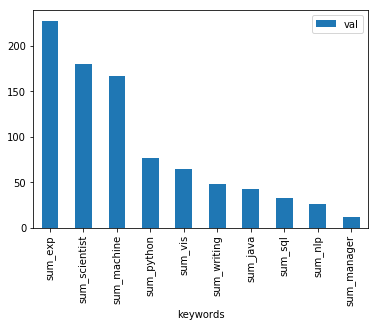

In [56]:
pd.DataFrame(x, columns=['keywords','val']).sort_values(by=['val'],ascending=False).set_index('keywords').plot(kind='bar')
#for majority of jobs experience,being data scientist and know machine learning,Python and visualisation  are the most important thing, but i need to find out if there is any difference betweena and lower rate ones

In [57]:
list2=['vis','nlp','scientist','python','sql','experience','manager','java','writing','machine']

In [58]:
#to see the importance of some job features for paid job over the median.
data.loc[data['dumsal']>0].groupby(['state'])[list2].sum()

,vis,nlp,scientist,python,sql,experience,manager,java,writing,machine
state,,,,,,,,,,
NSW,1,0,38,12,0,37,0,0,24,14
QLD,0,0,1,0,0,0,0,0,0,0
VIC,0,0,1,0,0,2,0,0,0,3


In [59]:
#those with salary overage have experience and knowledge of visualisation and python
data.loc[data['dumsal']==0].groupby(['state'])[list2].sum()

,vis,nlp,scientist,python,sql,experience,manager,java,writing,machine
state,,,,,,,,,,
NSW,64,0,81,46,14,187,12,24,24,94
Nan,0,0,0,0,0,0,0,0,0,0
QLD,0,0,0,19,19,0,0,19,0,19
VIC,0,26,59,0,0,1,0,0,0,37
WA,0,0,0,0,0,1,0,0,0,0


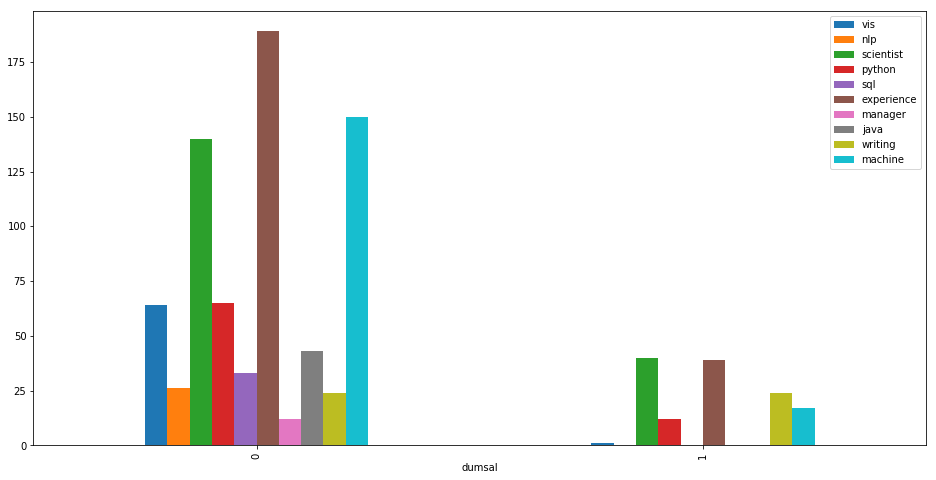

In [60]:

#to see what are the most important features for the two different job payments
data.groupby(['dumsal'])[list2].sum().sort_values(by=list2,ascending=False).plot(kind='bar',figsize=(16,8), fontsize=10)

### We have to reject Null hypthesises as for high job payments, features such as visualisation and python are not as important as they are for jobs with low payments.  

In [61]:
data.groupby(['dumsal'])['job_title'].value_counts()

dumsal  job_title                                                      
0       Data Scientist                                                     45
        Business Intelligence Analyst                                      33
        Data Analyst                                                       26
        Advanced Trainee                                                   24
        Budget Analyst                                                     24
        Business Analyst Process Improvement Professional                  24
        Executive Interviewer – Part Time                                  24
        Operations Analyst                                                 24
        Pathologist and Research Scientist                                 24
        Programming Geek                                                   24
        Property Analyst                                                   24
         Technology Solutions Professional                            

In [62]:
#completing a logistic regression model
from sklearn.linear_model import LogisticRegression

X=data[list2]
y = data.dumsal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
#this is my concatonated score since it's high I'm only going to use  

0.8691588785046729

In [63]:
y_pred = lr.predict(X_test)


In [64]:
df = pd.DataFrame(columns=['y_test','y_predict'])
df.y_test=y_test
df.y_predict=y_pred
print(df[df['y_test']==df['y_predict']].count(),'y_test=',len(y_test))

y_test       279
y_predict    279
dtype: int64 y_test= 321


In [65]:
#and a random forest classifier
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X, y, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.877 ± 0.007


In [66]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(rf, X, y, cv=6)
print ("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(rf, X, y, cv=6)
accuracy = metrics.accuracy_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)
#accuracy is high

Cross-validated scores: [0.87730061 0.88343558 0.88888889 0.87037037 0.89440994 0.85093168]
Cross-Predicted Accuracy: 0.8775720164609053


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[279   0]
 [ 42   0]]


The result is telling us that we have 271+12=283 correct predictions and 31incorrect predictions.

In [68]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#all the results are promising

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       279
          1       0.00      0.00      0.00        42

avg / total       0.76      0.87      0.81       321



C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
list(zip(clf.feature_importances_,X))
#it seems all features are important and none of them was deleted by L1-sceintist,experience,writing, machine an python are the most important

[(0.05155537534762953, 'vis'),
 (0.006786416633610823, 'nlp'),
 (0.2170255438247089, 'scientist'),
 (0.1962756370846519, 'python'),
 (0.023060230122627305, 'sql'),
 (0.1386661398441759, 'experience'),
 (0.0019553683693859705, 'manager'),
 (0.08729924676454094, 'java'),
 (0.18770270388457447, 'writing'),
 (0.08967333812409425, 'machine')]

In [76]:
#sending my final to a csv
data.to_csv("data_job.csv" , sep=',', encoding='utf-8')
